In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
%matplotlib inline

from lifelines.datasets import load_waltons
df = load_waltons() # returns a Pandas DataFrame

print df.head()
T = df['T']
E = df['E']

    T  E    group
0   6  1  miR-137
1  13  1  miR-137
2  13  1  miR-137
3  13  1  miR-137
4  19  1  miR-137


In [2]:
from lifelines import KaplanMeierFitter
kmf = KaplanMeierFitter()
kmf.fit(T, event_observed=E) # more succiently, kmf.fit(T,E)

<lifelines.KaplanMeierFitter: fitted with 163 observations, 7 censored>

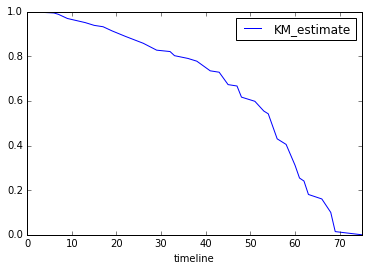

In [3]:
kmf.survival_function_.plot()

## Multiple groups

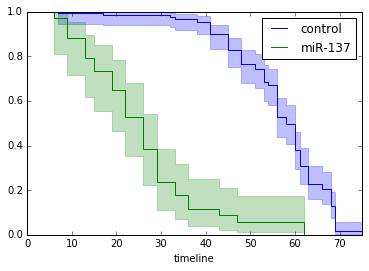

In [4]:
groups = df['group']
ix = (groups == 'miR-137')

kmf.fit(T[~ix], E[~ix], label='control')
ax = kmf.plot()

kmf.fit(T[ix], E[ix], label='miR-137')
kmf.plot(ax=ax)

# Survival Regression

In [5]:
from lifelines.datasets import load_regression_dataset
regression_dataset = load_regression_dataset()

regression_dataset.head()

,var1,var2,var3,T,E
0,0.595170,1.143472,1.571079,14.785479,1
1,0.209325,0.184677,0.356980,7.336734,1
2,0.693919,0.071893,0.557960,5.271527,1
3,0.443804,1.364646,0.374221,11.684168,1
4,1.613324,0.125566,1.921325,7.637764,1


In [6]:
from lifelines import AalenAdditiveFitter, CoxPHFitter

# Using Cox Proportional Hazards model
cf = CoxPHFitter()
cf.fit(regression_dataset, 'T', event_col='E')
cf.print_summary()

# Using Aalen's Additive model
aaf = AalenAdditiveFitter(fit_intercept=False)
aaf.fit(regression_dataset, 'T', event_col='E')

n=200, number of events=189

          coef  exp(coef)  se(coef)         z         p  lower 0.95  upper 0.95    
var1 2.083e-01  1.232e+00 6.992e-02 2.980e+00 2.886e-03   7.126e-02   3.454e-01  **
var2 4.607e-02  1.047e+00 7.506e-02 6.139e-01 5.393e-01  -1.011e-01   1.932e-01    
var3 2.110e-01  1.235e+00 7.316e-02 2.884e+00 3.931e-03   6.754e-02   3.544e-01  **
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1 

Concordance = 0.580
 [-----------------100%-----------------] 189 of 189 complete in 0.1 sec


/Users/Alun/Projects/survival27/lib/python2.7/site-packages/lifelines/fitters/coxph_fitter.py:285: FutureWarning: sort(columns=....) is deprecated, use sort_values(by=.....)
  df.sort(duration_col, inplace=True)


<lifelines.AalenAdditiveFitter: fitted with 200 observations, 11 censored>

/Users/Alun/Projects/survival27/lib/python2.7/site-packages/ipykernel/__main__.py:1: FutureWarning: using '-' to provide set differences with Indexes is deprecated, use .difference()
  if __name__ == '__main__':


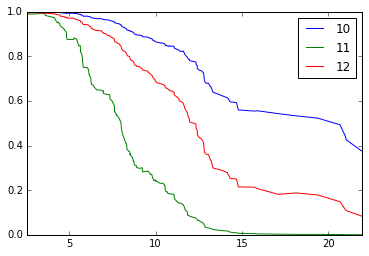

In [7]:
x = regression_dataset[regression_dataset.columns - ['E','T']]
aaf.predict_survival_function(x.ix[10:12]).plot() #get the unique survival functions of the first two subjects

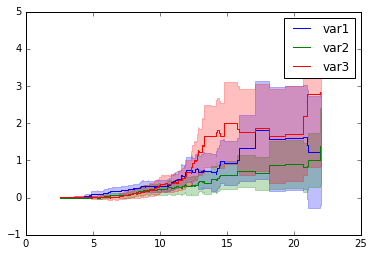

In [8]:
aaf.plot()